In [72]:
#imports 
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
np.random.randint(10,20)
random.sample(range(13), 10)

[7, 0, 12, 8, 1, 9, 4, 5, 2, 6]

In [4]:
LC = []
for i in range(1):
    L_i = np.random.randint(20, 50)
    print('L_i: ', L_i)

    t_i = np.sort(random.sample(range(L_i), L_i))
    print('t_i_j: ', t_i)
    
    u = np.random.randint(1,100, size = L_i)
    print('u: ', u)
    p_u = np.random.randint(100, size= L_i)
    print('p_u: ',p_u)
    
    b = np.random.randint(2)
    print('b: ',b)
    
    LC_i = {'flux': u,'error-flux': p_u,'time': t_i,'banda': b}
    LC.append(LC_i)


L_i:  43
t_i_j:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
u:  [83 28 17 20 48 95 29 94 30 87 70 45 65 62 72 96 37 48 87 96 53 56 54 25
 54 74 94 73 96  6 13 98 46 37 62 69  6 76 39  1 97 28 52]
p_u:  [66 42 26 98 77 46 55 91 65 15 21 92 32 49 60 43  8  8 45 84  3 57 61  4
  3 11 84 41 59 58 12 13 25 91 89 88  4 25 92 94 92  2 37]
b:  1


In [5]:
LC

[{'flux': array([83, 28, 17, 20, 48, 95, 29, 94, 30, 87, 70, 45, 65, 62, 72, 96, 37,
         48, 87, 96, 53, 56, 54, 25, 54, 74, 94, 73, 96,  6, 13, 98, 46, 37,
         62, 69,  6, 76, 39,  1, 97, 28, 52]),
  'error-flux': array([66, 42, 26, 98, 77, 46, 55, 91, 65, 15, 21, 92, 32, 49, 60, 43,  8,
          8, 45, 84,  3, 57, 61,  4,  3, 11, 84, 41, 59, 58, 12, 13, 25, 91,
         89, 88,  4, 25, 92, 94, 92,  2, 37]),
  'time': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42]),
  'banda': 1}]

In [184]:
LC[1]['flux']

array([23, 15, 13, 81, 14, 75, 46, 95, 13, 90, 38, 74, 62, 88,  8, 70, 93,
       34, 86, 83, 88, 62, 62, 65,  3, 56, 20, 78, 99, 62, 18, 50, 77, 78,
       29, 64, 70, 63, 44, 22, 98])

In [187]:
#serial enconder

one_hot_g = [1,0]
one_hot_r = [0,1]

for i in range(1):
    LC_i = LC[i]
    encoder_input= []
    band_concat= []
    for j in range(len(LC_i['time'])):
        u_i = LC_i['flux']
        log_u_i_j = np.array(np.log(u_i[j]))
        if LC_i['banda'] == 1:
            band_concat_j=np.append(log_u_i_j, one_hot_g)
        else:
            band_concat_j=np.append(log_u_i_j, one_hot_r)
        band_concat.append(band_concat_j)
    print(band_concat)

[array([4.12713439, 0.        , 1.        ]), array([3.21887582, 0.        , 1.        ]), array([3.13549422, 0.        , 1.        ]), array([1.79175947, 0.        , 1.        ]), array([3.87120101, 0.        , 1.        ]), array([4.11087386, 0.        , 1.        ]), array([3.49650756, 0.        , 1.        ]), array([4.38202663, 0.        , 1.        ]), array([3.78418963, 0.        , 1.        ]), array([3.49650756, 0.        , 1.        ]), array([4.34380542, 0.        , 1.        ]), array([3.80666249, 0.        , 1.        ]), array([1.38629436, 0.        , 1.        ]), array([4.17438727, 0.        , 1.        ]), array([3.76120012, 0.        , 1.        ]), array([4.38202663, 0.        , 1.        ]), array([1.09861229, 0.        , 1.        ]), array([4.41884061, 0.        , 1.        ]), array([3.73766962, 0.        , 1.        ]), array([4.33073334, 0.        , 1.        ]), array([3.4339872, 0.       , 1.       ]), array([3.4339872, 0.       , 1.       ]), array([4.382026

## Supernova parametric model (SPM)

Existen 4 tipos de supernovas: SNIbc, SNIa, SNII, SLSN

In [54]:
# parameters

#Amplitud: cerca de 20
A = 20

#t0
t_0 = 58640 

#t_1
t_1 = 58670 

#gamma: controls the time duration of the SN-plateau region
gamma = t_1-t_0

#beta: controls the slope of the SN-plateau region
B = 0.5

#t_rise: controls the required time to reach the maximum brightness along the light-curve
t_rise = 25

#t_fall: controls the brightness decay time along and after the SN-plateau region
t_fall = 40


In [55]:
F=[]

F.append(1)

F

[1]

In [78]:
def sigmoid(t):
    return 1/(1 + exp(−t))

def SPM(t, A, t_0, t_1, B, t_rise, t_fall):
    gamma = t_1 - t_0
    F = []
    for t_i in t:
        if t_i >= t_1:
            x = (A*(1-B)*np.exp(gamma/t_fall))
            y = (1+np.exp(-(t_i-t_0)/t_rise))
            F_i = x/y
        else:
            x = A*(1-B*((t_i-t_0)/gamma))
            y = (1+np.exp(-(t_i-t_0)/t_rise))
            F_i = x/y
        F.append(F_i)
    return F

100


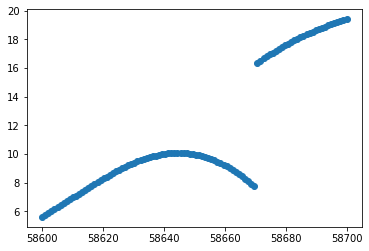

In [79]:
t = np.linspace(58600,58700,100)
F = SPM(t, A, t_0, t_1, B, t_rise, t_fall)
print(len(F))

plt.plot(t, F, 'o')
plt.show()